# <center> 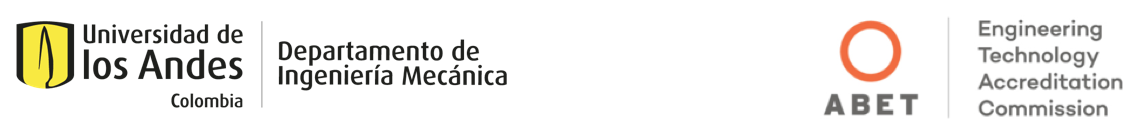
## <span style="color: #147CA6"><center> IMEC 2001-Herramientas Computacionales
## <span style="color: #1AA3D9"><center> Taller 1-Introducción

### <span style="color: #147CA6">Fecha Límite de Entrega (Bloque Neón): <font color="#1AA3D9">TODO</font>
___
### <span style="color: #147CA6"> Descripción de la actividad

La actividad tiene como objetivo percibir el conocimiento general de los temas del curso. Si no es posible solucionar el ejercicio escriba qué fuentes buscó para intentarlo y qué limitaciones tuvo para implementar la solución.

### <span style="color: #147CA6"> Tener en Cuenta

1. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión <font color="#1AA3D9">'.ipynb'</font>).

**Nota:** <font color="#1AA3D9">El nombre del archivo debe ser: `Taller1_NombreApellido1_NombreApellido2.ipynb`.</font>

---

### <span style="color: #1AA3D9"><center> Item 1: Funciones

Se busca preparar la nómina de una pequeña empresa. Los datos suministrados son el número de horas trabajadas (<font color="#1AA3D9">num_horas</font>) y la tasa de pago (<font color="#147CA6">tasa_pago</font>). Para esto, se tienen las siguientes condiciones:

1. Si <font color="#1AA3D9">num_horas</font> es menor o igual a 40, calculamos el pago regular (pago_regular) multiplicando num_horas por <font color="#147CA6">tasa_pago</font>, y el pago de horas extras (pago_extras) es igual a 0.

2. Si <font color="#1AA3D9">num_horas</font> es mayor a 40, calculamos el pago regular y adicionamos el pago pago de horas extras (pago_extras) con un incremento del 50% sobre la <font color="#147CA6">tasa_pago</font>.

3. El salario neto (neto) se calcula sumando el pago regular (pago_regular) y el pago de horas extras (pago_extras).

Escriba una función que permita calcular el pago de nómina de la pequeña empresa.

#### <span style="color: #1AA3D9">Ejemplo

<span style="color: #147CA6"> Input </span>

num_horas = 30

tasa_pago = 25

<span style="color: #147CA6"> Output </span>

neto = 750



In [3]:
def pago_nomina(num_horas, tasa_pago):

    pago_regular = num_horas * tasa_pago
    pago_extra = 0
    
    if num_horas > 40:
        pago_extra = pago_regular * 0.5
        
    return int(pago_regular + pago_extra)

num_horas = int(input("Ingrese número de horas trabajadas: "))
tasa_pago = int(input("Ingrese tasa de pago: "))

print(pago_nomina(num_horas, tasa_pago))

Ingrese número de horas trabajadas:  30
Ingrese tasa de pago:  25


750


___

### <span style="color: #1AA3D9"><center> Item 2: Ajuste de datos

En la ruta <span style="color: #1AA3D9; font-weight: bold">data > engines.xlsx</span> dispone las variables <span style="font-style: italic">Mass (kg)</span> y <span style="font-style: italic">Revolutions per Minute (RPM)</span>. A partir de estos datos se requiere:

1. Realizar la regresión lineal (línea de tendencia).

2. Extraer los valores de pendiente e intercepto.

3. Estimar el valor de <span style="font-style: italic">R<sup>2</sup></span>


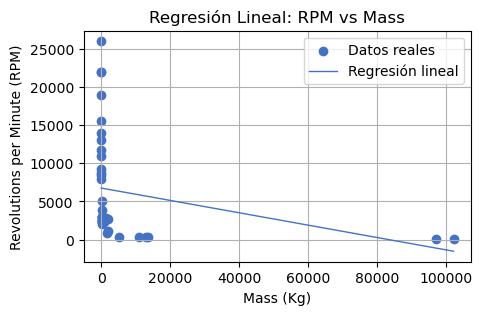

Pendiente: -0.08
Intercepto: 6761.89
R**2: 0.07


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_excel('./data/engines.xlsx', sheet_name='Data')

X = df[['Mass (Kg)']].values  # Variable independiente
y = df['Revolutions per Minute (RPM)'].values  # Variable dependiente

model = LinearRegression() # Modelo de regresion
model.fit(X, y) # Ajustar modelo

y_pred = model.predict(X) # Predecir valores 

pendiente = model.coef_[0]
intercepto = model.intercept_
r2 = r2_score(y, y_pred)

plt.figure(figsize=(5, 3))
plt.scatter(X, y, color='#4472C4', label='Datos reales')
plt.plot(X, y_pred, color='#4472C4', linewidth=1, label='Regresión lineal')
plt.xlabel('Mass (Kg)')
plt.ylabel('Revolutions per Minute (RPM)')
plt.title('Regresión Lineal: RPM vs Mass')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pendiente: {pendiente:.2f}")
print(f"Intercepto: {intercepto:.2f}")
print(f"R**2: {r2:.2f}")


___
### <span style="color: #1AA3D9"><center> Item 3: Interpolación

Se realizaron las siguientes cinco mediciones de datos:

<style>
        table {
            width: 60%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid #ccc;
            padding: 10px;
            text-align: center;
        }

</style>

<center><table>
        <tr>
            <th><span style="color: #1AA3D9">Y</th>
            <td>0</td>
            <td>6</td>
            <td>12</td>
            <td>20</td>
            <td>26</td>
        </tr>
        <tr>
            <th><span style="color: #1AA3D9">X</th>
            <td>655</td>
            <td>645</td>
            <td>620</td>
            <td>560</td>
            <td>455</td>
        </tr>
</table></center>


A partir de estos datos se requiere conocer el valor de Y cuando X toma los valores de 650, 580 y 461.

In [16]:
import numpy as np
from scipy.interpolate import interp1d

Y = [0, 6, 12, 20, 26]
X = [655, 645, 620, 560, 455]

valores = [650, 580, 461]

funcion = interp1d(X, Y, kind='linear', fill_value='extrapolate')
resultados = funcion(valores)

i = 0
while i < len(valores):
    print("Cuando X toma el valor de {}, Y toma el valor de {:.2f}.".format(valores[i], resultados[i]))
    i += 1

Cuando X toma el valor de 650, Y toma el valor de 3.00.
Cuando X toma el valor de 580, Y toma el valor de 17.33.
Cuando X toma el valor de 461, Y toma el valor de 25.66.


___
### <span style="color: #1AA3D9"><center> Item 4: Raíces

<p>Los datos de esfuerzo (&sigma;) y deformación (&epsilon;) tomados a partir de un ensayo de tensión generaron los siguientes resultados de regresión :</p>

\begin{matrix}
\sigma_{\text{elástico}} = 23268\epsilon + 11 \quad \text{para la región elástica}
\end{matrix}


\begin{matrix}
\sigma_{\text{plástico}} = 26202\epsilon^{3} - 11347\epsilon^{2} + 1332\epsilon + 78 \quad \text{para la región plástica}
\end{matrix}

<p>El límite elástico es el punto en donde se pasa se la región elástica a la región plástica. En otras palabras, el límite elástico se obtiene en el punto σ<sub>elástico</sub>=σ<sub>plástico</sub></p>

Estime el límite elástico.




In [1]:
import numpy as np

coef = [26202, -11347, -21936, 67]

raices = np.roots(coef)

raices_reales = [r.real for r in raices if np.isreal(r) and r.real > 0]

for r in raices_reales:
    print(f"Límite elástico en ε ≈ {r:.4f}")


Límite elástico en ε ≈ 1.1556
Límite elástico en ε ≈ 0.0030


___
### <span style="color: #1AA3D9"><center> Item 5: Sistemas de ecuaciones

Las ecuaciones que describen un sistema mecánico en estado estático son:

\begin{matrix}
-A \cos(2.92^\circ) - B \sin(33.8^\circ) - 0.601L \sin(47.9^\circ) + 1.02L \cos(78.8^\circ) = 0 \\
-A \sin(2.92^\circ) + B \cos(33.8^\circ) - 0.601L \cos(47.9^\circ) - 1.02L \sin(78.8^\circ) = 0
\end{matrix}

Siendo 
\begin{matrix} 
L=15N
\end{matrix}

Estime las fuerzas A y B


In [ ]:
import numpy as np
from numpy.linalg import solve
from math import sin, cos, radians

L = 15

ca = cos(radians(2.92))
sa = sin(radians(2.92))
cb = cos(radians(33.8))
sb = sin(radians(33.8))
s1 = sin(radians(47.9))
c1 = cos(radians(47.9))
s2 = sin(radians(78.8))
c2 = cos(radians(78.8))

# Construir sistema lineal
A = np.array([
    [-ca, -sb],
    [-sa,  cb]
])

b = np.array([
    0.601 * L * s1 - 1.02 * L * c2,
    0.601 * L * c1 + 1.02 * L * s2
])

# Resolver
A_val, B_val = solve(A, b)

# Mostrar resultados
print(f"Fuerza A ≈ {A_val:.2f} N")
print(f"Fuerza B ≈ {B_val:.2f} N")


___
### <span style="color: #1AA3D9"><center> Item 6: Optimización

<p>Los datos de esfuerzo (&sigma;) y deformación (&epsilon;) tomados a partir de un ensayo de tensión generaron los siguientes resultados de regresión :</p>

\begin{matrix}
\sigma_{\text{elástico}} = 23268\epsilon + 11 \quad \text{para la región elástica}
\end{matrix}


\begin{matrix}
\sigma_{\text{plástico}} = 26202\epsilon^{3} - 11347\epsilon^{2} + 1332\epsilon + 78 \quad \text{para la región plástica}
\end{matrix}

El esfuerzo último es el valor máximo de esfuerzo de la región plástica 

\begin{matrix}
\sigma_{\text{último}} = máx(\sigma_{\text{plástico}})
\end{matrix}

Estime el esfuerzo último

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

def s_plastico(e):
    return 26202 * e**3 - 11347 * e**2 + 1332 * e + 78

res = minimize_scalar(lambda e: -s_plastico(e), bounds=(0, 1), method='bounded')


e_max = res.x
s_ultimo = s_plastico(e_max)

print(f"Deformación donde ocurre el esfuerzo último: ε ≈ {e_max:.4f}")
print(f"Esfuerzo último: σ_último ≈ {s_ultimo:.2f} MPa")


___
### <span style="color: #1AA3D9"><center> Item 7: Incertidumbre

Se realizaron las siguientes cinco mediciones de datos de <span style="font-style: italic">Masa (m)</span> y <span style="font-style: italic">Velocidad (v)</span>:

<style>
        table {
            width: 60%;
            border-collapse: collapse;
        }
        th, td {
            border: 1px solid #ccc;
            padding: 10px;
            text-align: center;
        }

</style>

<center><table>
        <tr>
            <th><span style="color: #1AA3D9">m</th>
            <td>3.1</td>
            <td>2.8</td>
            <td>2.9</td>
            <td>3.0</td>
            <td>3.2</td>
        </tr>
        <tr>
            <th><span style="color: #1AA3D9">v</th>
            <td>9.9</td>
            <td>10.5</td>
            <td>10.2</td>
            <td>9.6</td>
            <td>9.9</td>
        </tr>
</table></center>


A partir de esta información:
1. Estime la incertidumbre asociada a cada variable.
2. Estime la energía cinética y su incertidumbre asociada.

\begin{matrix}
E_c=\frac{1}{2}\ mv^2
\end{matrix}


In [ ]:
import numpy as np 

m = np.array([3.1, 2.8, 2.9, 3.0, 3.2])   
v = np.array([9.9, 10.5, 10.2, 9.6, 9.9])

m_mean = np.mean(m)
v_mean = np.mean(v)

u_m = np.std(m, ddof=1)
u_v = np.std(v, ddof=1)

Ec = 0.5 * m_mean * v_mean**2

u_Ec = Ec * np.sqrt( (u_m / m_mean)**2 + (2 * u_v / v_mean)**2 )

print("Incertidumbre de la masa "+str(round(u_m,3))+" Kg")
print("Incertidumbre de la velocidad "+str(round(u_v,3))+"m/s")
print("Energia cinetica promedio "+str(round(Ec,3))+"J")
print("Incertidumbre en la Energia cinetica "+str(round(u_Ec,3))+"J")

___
### <span style="color: #1AA3D9"><center> Item 8: ODE

El comportamiento dinámico de un sistema masa-resorte-amortiguador se puede describir a partir de la masa (<span style="font-style: italic">m</span>), la constante de rigidez del resorte (<span style="font-style: italic">k</span>) y la constante de amortiguamiento (<span style="font-style: italic">c</span>) y una fuerza externa (<span style="font-style: italic">F</span>) que incita el movimiento.

\begin{matrix}
\ddot{x} + \frac{c}{m} \dot{x} + \frac{k}{m} x = \frac{F}{m}
\end{matrix}

Asumiendo que: 

\begin{align*}
    {m} =5 \text{kg} \\
    \\
    {k} =33 \frac{N}{m} \\
    \\
    {c} =10 \frac{Ns}{m} \\
    \\
    {F} =90 {N} \\
    \\
    \ddot{x}_{{t}=0}=0 \\
    \\
    \dot{x}_{{t}=0}=10
\end{align*}

1. Estime el comportamiento de la velocidad con respecto al tiempo (t) desde t=0 hasta t=25.
2. Estime el comportamiento de la posición con respecto al tiempo (t) desde t=0 hasta t=25.


In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


m, k, c, F = 5, 33, 10, 90


def f(t, y):
    x, v = y
    return [v, (F - c*v - k*x)/m]


sol = solve_ivp(f, [0, 25], [0, 10], t_eval=np.linspace(0, 25, 300))


plt.plot(sol.t, sol.y[0], label='Posición x(t)')
plt.plot(sol.t, sol.y[1], label='Velocidad v(t)')
plt.xlabel('Tiempo [s]')
plt.legend()
plt.grid()
plt.title('Sistema masa-resorte-amortiguador')
plt.show()
